In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r"C:\Users\Suwani Gunasekara\OneDrive\Documents\Sem 7 ML\winequality-white_onezero.csv")

In [6]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [8]:
y.shape

(4898,)

In [9]:
X = X.values
y = y.values

X = X.T
y = y.T

In [3]:
def sigmoid(x):
    return 1/(1 + np.exp(-x))

In [11]:
def model(X, Y, learning_rate, iterations):
    
    m = X.shape[1]
    n = X.shape[0]
    
    W = np.zeros((n,1))
    B = 0
    
    cost_list = []
    
    for i in range(iterations):
        
        Z = np.dot(W.T, X) + B
        A = sigmoid(Z)
        
        # cost function
        cost = -(1/m)*np.sum( Y*np.log(A) + (1-Y)*np.log(1-A))
        
        # Gradient Descent
        dW = (1/m)*np.dot(A-Y, X.T)
        dB = (1/m)*np.sum(A - Y)
        
        W = W - learning_rate*dW.T
        B = B - learning_rate*dB
        
        # Keeping track of our cost function value
        cost_list.append(cost)
        
        if(i%(iterations/10) == 0):
            print("cost after ", i, "iteration is : ", cost)
        
    return W, B, cost_list

In [17]:
iterations = 100000
learning_rate = 0.01
W, B, cost_list = model(X, y, learning_rate = learning_rate, iterations = iterations)

cost after  0 iteration is :  0.6931471805599453


C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in log
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in multiply


cost after  10000 iteration is :  1.976936242488549
cost after  20000 iteration is :  6.1719444661073455
cost after  30000 iteration is :  24.358553300026706
cost after  40000 iteration is :  6.718352074916213
cost after  50000 iteration is :  2.1063918142743625
cost after  60000 iteration is :  7.468028393148709
cost after  70000 iteration is :  nan
cost after  80000 iteration is :  16.73769174893567
cost after  90000 iteration is :  4.042809004128917


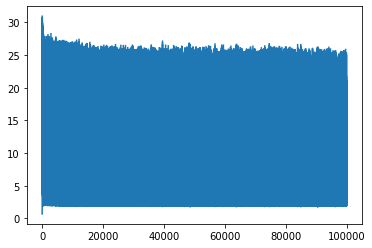

In [18]:
plt.plot(np.arange(iterations), cost_list)
plt.show()

In [14]:
def accuracy(X, Y, W, B):
    
    Z = np.dot(W.T, X) + B
    A = sigmoid(Z)
    
    A = A > 0.5
    
    A = np.array(A, dtype = 'int64')
    
    acc = (1 - np.sum(np.absolute(A - Y))/Y.shape[1])*100
    
    print("Accuracy of the model is : ", round(acc, 2), "%")

In [16]:
accuracy(X, y, W, B)

IndexError: tuple index out of range